# 설문조사 결과로 이혼 예측해보기 

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd 

In [26]:
DIVORCE_PATH = os.path.join("dataset","divorce")
IMAGES_PATH = os.path.join('.','images','divorce_predict')
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png',
            resolution=30):
    path = os.path.join(IMAGES_PATH,fig_id+'.'+fig_extension)
    print("그림 저장:",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [19]:
def load_divorce_data(divorce_path=DIVORCE_PATH):
    csv_path = os.path.join(divorce_path, "divorce_data.csv")
    return pd.read_csv(csv_path,sep=';') #dataframe형식으로 불러옴

In [50]:
tsv_path = os.path.join(DIVORCE_PATH, "reference.tsv")
ref = pd.read_csv(tsv_path, sep='|',index_col='atribute_id')

In [55]:
ref

,description
atribute_id,
1,If one of us apologizes when our discussion de...
2,"I know we can ignore our differences, even if ..."
3,"When we need it, we can take our discussions w..."
4,"When I discuss with my spouse, to contact him ..."
5,The time I spent with my wife is special for us.
6,We don't have time at home as partners.
7,We are like two strangers who share the same e...
8,I enjoy our holidays with my wife.
9,I enjoy traveling with my wife.


In [70]:
divorce = load_divorce_data()
divorce.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [57]:
divorce.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

그림 저장: attribute_hisogram_plots


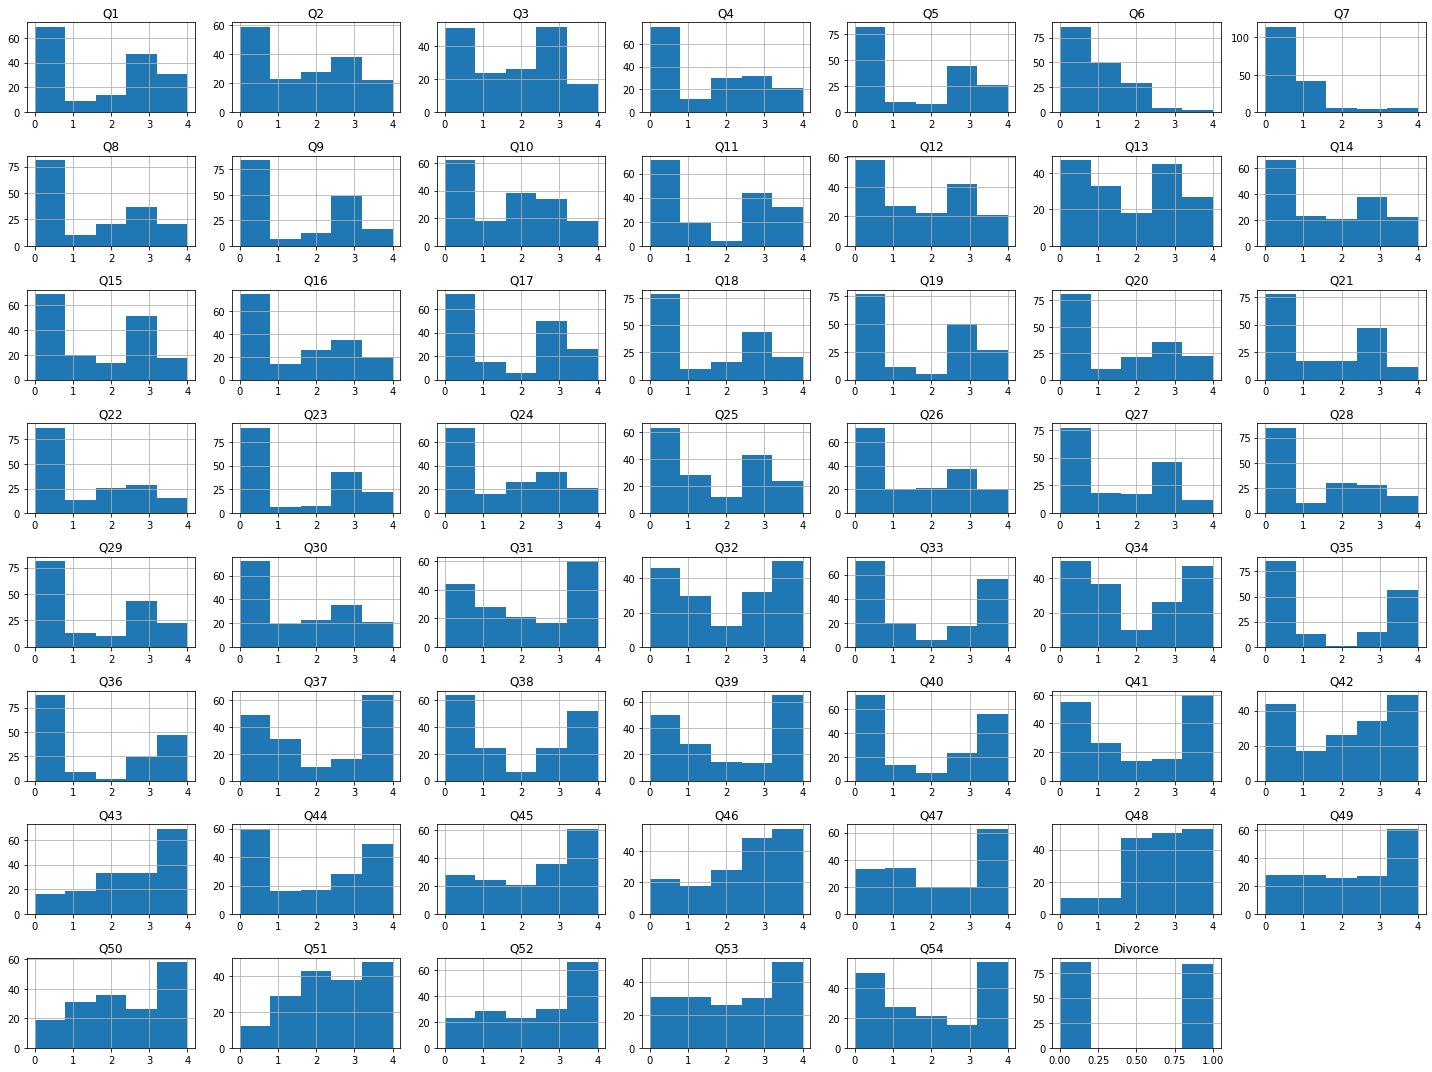

In [28]:
divorce.hist(bins=5, figsize=(20,15))
save_fig("attribute_hisogram_plots")

In [29]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(divorce, test_size=0.2,
                                      random_state=1021)

divorce = train_set.copy()

In [30]:
corr_matrix = divorce.corr()

In [31]:
corr_matrix['Divorce'].sort_values(ascending=False)

Divorce    1.000000
Q19        0.940534
Q17        0.939046
Q18        0.935132
Q40        0.932041
Q11        0.915896
Q9         0.909064
Q20        0.905127
Q41        0.902592
Q39        0.901639
Q15        0.900853
Q29        0.897435
Q38        0.892031
Q5         0.886986
Q30        0.884449
Q36        0.882186
Q16        0.881583
Q26        0.880256
Q8         0.875971
Q12        0.875725
Q27        0.867383
Q1         0.867054
Q21        0.864371
Q35        0.859831
Q4         0.859503
Q14        0.859209
Q33        0.859077
Q25        0.851964
Q28        0.851032
Q37        0.847289
Q24        0.845135
Q10        0.844618
Q13        0.842053
Q44        0.836484
Q34        0.832771
Q22        0.827201
Q23        0.827021
Q2         0.811686
Q32        0.810640
Q54        0.794599
Q3         0.786995
Q31        0.775231
Q42        0.748218
Q49        0.741410
Q50        0.719062
Q53        0.693381
Q52        0.645307
Q51        0.640928
Q47        0.633695
Q48        0.605675


그림 저장: scatter_matrix_plot


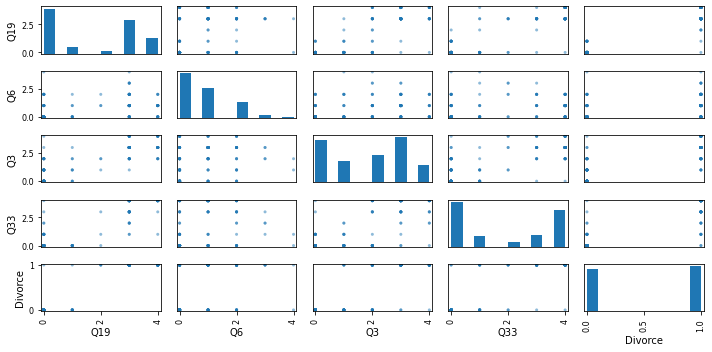

In [54]:
from pandas.plotting import scatter_matrix

attributes = ['Q19','Q6','Q3','Q33','Divorce']
scatter_matrix(divorce[attributes], figsize=(10,5))
save_fig("scatter_matrix_plot")

In [74]:
divorce_set = divorce.drop('Divorce',axis=1)
divorce_label = divorce.loc[:,'Divorce']

In [76]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(divorce_set,divorce_label)

LinearRegression()

In [78]:
print("Predictions:",lin_reg.predict(divorce_set))
print("Labels:",divorce_label)

Predictions: [ 6.03283176e-01  9.82610364e-01  1.03847403e+00  1.10052417e+00
  6.82774059e-01  7.25349452e-01  9.58227644e-01  9.53355343e-01
  9.35704474e-01  7.51058034e-01  1.08672057e+00  1.08672057e+00
  1.05626308e+00  1.05626308e+00  1.05615723e+00  1.05801153e+00
  1.05801153e+00  1.00516795e+00  1.05179828e+00  1.00516795e+00
  1.04523613e+00  1.04523613e+00  9.82336827e-01  1.03328847e+00
  1.03246073e+00  1.03328847e+00  1.03071560e+00  1.02240500e+00
  1.03586464e+00  1.03503691e+00  1.03586464e+00  9.82193334e-01
  9.73882737e-01  1.01667058e+00  9.83021065e-01  1.02308924e+00
  1.03863020e+00  1.01373551e+00  1.01373551e+00  9.63683515e-01
  9.99430386e-01  1.01206229e+00  9.79638873e-01  1.01289002e+00
  1.01206229e+00  1.00457942e+00  1.01289002e+00  1.00457942e+00
  1.01206229e+00  1.01289002e+00  1.01206229e+00  1.00200656e+00
  9.45173696e-01  9.66863476e-01  9.42600832e-01  9.60301322e-01
  9.08285479e-01  9.08285479e-01  9.41536627e-01  9.89915402e-01
  9.89915402

In [79]:
from sklearn.metrics import mean_squared_error

divorce_predictions = lin_reg.predict(divorce_set)
lin_mse = mean_squared_error(divorce_label, divorce_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0872101760125106

In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, divorce_set, divorce_label,
                        scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [81]:
print("mean:",lin_rmse_scores.mean())
print("SD:",lin_rmse_scores.std())

mean: 0.17234924694473747
SD: 0.11856859665821337


In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(divorce_set,divorce_label)

RandomForestRegressor(n_estimators=10, random_state=42)

In [84]:
divorce_predictions = forest_reg.predict(divorce_set)
forest_mse = mean_squared_error(divorce_label, divorce_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.06324555320336758

In [85]:
forest_scores = cross_val_score(forest_reg, divorce_set, divorce_label,
                               scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [87]:
print("Mean:",forest_rmse_scores.mean())
print("SD:",forest_rmse_scores.std())

Mean: 0.09342991442799661
SD: 0.1162159421405871


In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distribe={
    'n_estimators':randint(1,200),
    'max_features':randint(1,55)
}

forest_reg = RandomForestRegressor(random_state=1021)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=
                                params_distribe, n_iter=10,cv=20,
                                scoring="neg_mean_squared_error",
                                random_state=1021)
rnd_search.fit(divorce_set,divorce_label)

RandomizedSearchCV(cv=20, estimator=RandomForestRegressor(random_state=1021),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x2ac44f490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x2ac452610>},
                   random_state=1021, scoring='neg_mean_squared_error')

In [97]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres['params']):
    print(np.sqrt(-mean_score),params)

0.13765000721866022 {'max_features': 18, 'n_estimators': 66}
0.14729451210670935 {'max_features': 34, 'n_estimators': 162}
0.13936162019883644 {'max_features': 8, 'n_estimators': 153}
0.13812555565301224 {'max_features': 6, 'n_estimators': 118}
0.1414256022893058 {'max_features': 14, 'n_estimators': 198}
0.15041833341593241 {'max_features': 46, 'n_estimators': 73}
0.1395871831870264 {'max_features': 8, 'n_estimators': 148}
0.14585235588307072 {'max_features': 35, 'n_estimators': 117}
0.14261347316998976 {'max_features': 20, 'n_estimators': 197}
0.14191752643664501 {'max_features': 7, 'n_estimators': 64}


In [101]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([1.37780684e-03, 7.61651017e-04, 1.11403967e-03, 1.34423527e-02,
       6.81790523e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.10812986e-02, 3.04204173e-04, 1.28860436e-01, 2.85244471e-04,
       5.74054498e-04, 1.62916822e-02, 1.55814561e-02, 1.55040592e-02,
       8.93034662e-02, 1.59630345e-01, 2.02870126e-01, 6.11921411e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.01867499e-04,
       1.16267618e-03, 8.00770915e-02, 4.29292929e-04, 3.39269672e-03,
       3.60044391e-04, 2.41718992e-04, 2.38198324e-04, 0.00000000e+00,
       6.84459390e-04, 0.00000000e+00, 3.12115757e-04, 1.58417271e-02,
       3.58721270e-04, 3.57297486e-04, 3.49722466e-03, 1.05494192e-01,
       9.14278358e-04, 1.04748790e-03, 0.00000000e+00, 2.02184240e-03,
       0.00000000e+00, 5.39538663e-04, 7.60809954e-04, 0.00000000e+00,
       5.74634789e-04, 1.78277795e-04, 0.00000000e+00, 9.15791700e-04,
       1.04186010e-03, 0.00000000e+00])

In [105]:
attributes = divorce_set.keys()
sorted(zip(feature_importances, attributes),reverse=True)

[(0.20287012564626347, 'Q19'),
 (0.15963034483203523, 'Q18'),
 (0.12886043645127082, 'Q11'),
 (0.10549419197617639, 'Q40'),
 (0.08930346620493669, 'Q17'),
 (0.08007709149649128, 'Q26'),
 (0.071081298588281, 'Q9'),
 (0.061192141067602034, 'Q20'),
 (0.016291682228146344, 'Q14'),
 (0.015841727054803356, 'Q36'),
 (0.015581456059502691, 'Q15'),
 (0.015504059234041988, 'Q16'),
 (0.013442352704461483, 'Q4'),
 (0.0034972246629474788, 'Q39'),
 (0.003392696723344954, 'Q28'),
 (0.002021842397615989, 'Q44'),
 (0.0013778068379479299, 'Q1'),
 (0.0011626761846448303, 'Q25'),
 (0.0011140396697168911, 'Q3'),
 (0.0010474879043276502, 'Q42'),
 (0.0010418600962365028, 'Q53'),
 (0.0009157917004861241, 'Q52'),
 (0.0009142783578096418, 'Q41'),
 (0.0007616510172974595, 'Q2'),
 (0.0007608099536054764, 'Q47'),
 (0.0007018674991799293, 'Q24'),
 (0.0006844593898165328, 'Q33'),
 (0.0006817905229734363, 'Q5'),
 (0.0005746347893010243, 'Q49'),
 (0.000574054498473103, 'Q13'),
 (0.0005395386627058182, 'Q46'),
 (0.0004

In [109]:
final_model = rnd_search.best_estimator_

X_test = test_set.drop('Divorce',axis=1)
y_test = test_set.loc[:,'Divorce'].copy()

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

0.07381648707695176

In [118]:
sorted(zip(y_test, final_predictions)) #sorted:새로운 리스트로 반환

[(0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.030303030303030304),
 (0, 0.045454545454545456),
 (0, 0.045454545454545456),
 (0, 0.24242424242424243),
 (1, 0.6515151515151515),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0)]